# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif, VarianceThreshold

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/viapiyaaa/bank_transaction_data/refs/heads/main/Dataset_inisiasi.csv')
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

In [4]:
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966
std,291.946243,17.792198,69.963757,0.602662,3900.942499
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


In [5]:
df["TransactionDate"] = pd.to_datetime(df["TransactionDate"])

In [6]:
df["PreviousTransactionDate"] = pd.to_datetime(df["PreviousTransactionDate"])

In [7]:
df.isna().sum()

,0
TransactionID,0
AccountID,0
TransactionAmount,0
TransactionDate,0
TransactionType,0
Location,0
DeviceID,0
IP Address,0
MerchantID,0
Channel,0


In [8]:
print("Jumlah duplikasi: ", df.duplicated().sum())

Jumlah duplikasi:  0


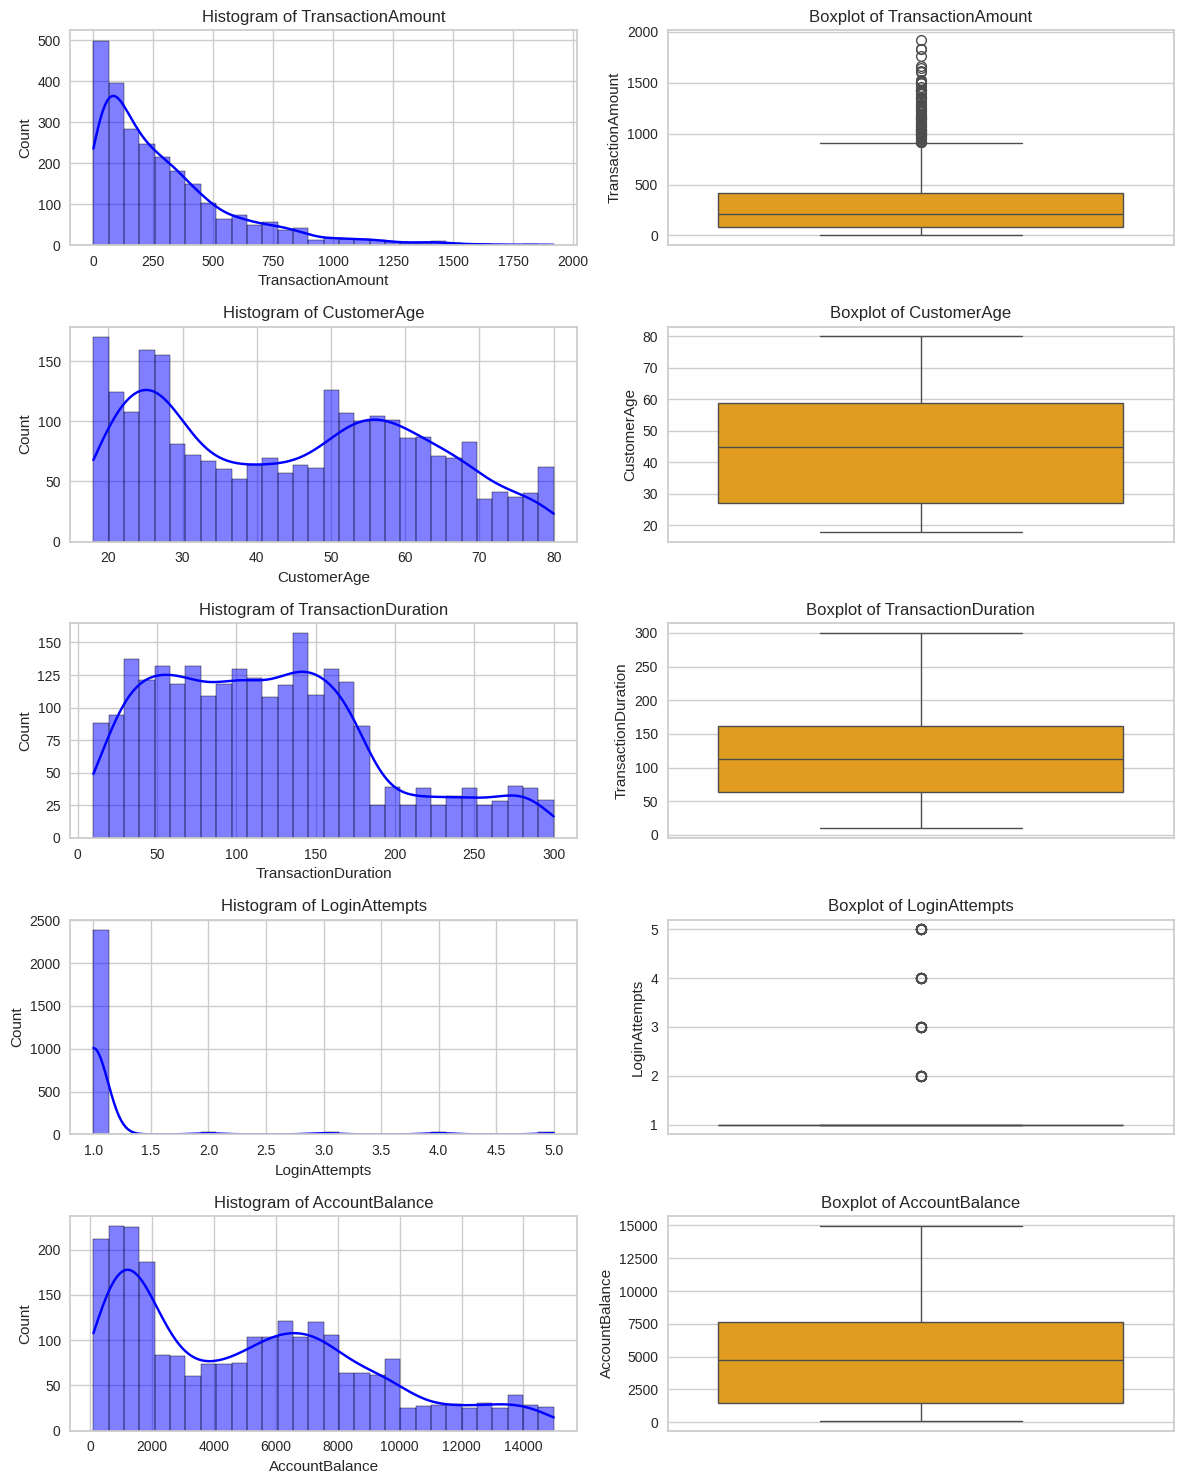

In [9]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Tentukan jumlah baris dan kolom untuk subplot
num_cols = len(numerical_columns)
fig, axes = plt.subplots(num_cols, 2, figsize=(12, num_cols * 3))

# Loop untuk setiap kolom numerik
for i, col in enumerate(numerical_columns):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i, 0], color='blue')
    axes[i, 0].set_title(f'Histogram of {col}')

    sns.boxplot(y=df[col], ax=axes[i, 1], color='orange')
    axes[i, 1].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

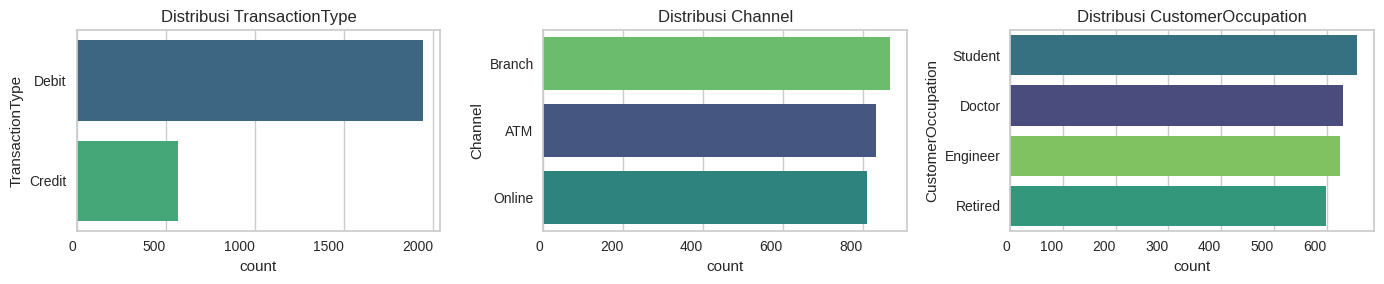

In [10]:
# Pilih fitur kategorikal, kecuali yang mengandung "ID", "IP Address", dan "Location"
cat_features = df.select_dtypes(include=[object])
excluded_cols = [col for col in cat_features.columns if 'ID' in col or col in ['IP Address', 'Location']]
cat_features = cat_features.drop(columns=excluded_cols)

# Tentukan jumlah subplot
cols = 3
rows = (len(cat_features.columns) + cols - 1) // cols
plt.figure(figsize=(14, rows * 3))

# Tentukan batas jumlah kategori yang akan ditampilkan
top_n = 20  # Atur jumlah kategori maksimal untuk visualisasi

# Loop melalui setiap fitur kategorikal
for i, column in enumerate(cat_features.columns, 1):
    plt.subplot(rows, cols, i)

    sns.countplot(data=cat_features, y=column, hue=column,
                  palette='viridis', legend=False,
                  order=cat_features[column].value_counts().index)
    plt.title(f'Distribusi {column}')

    plt.xticks(rotation=0, ha='right')
    plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

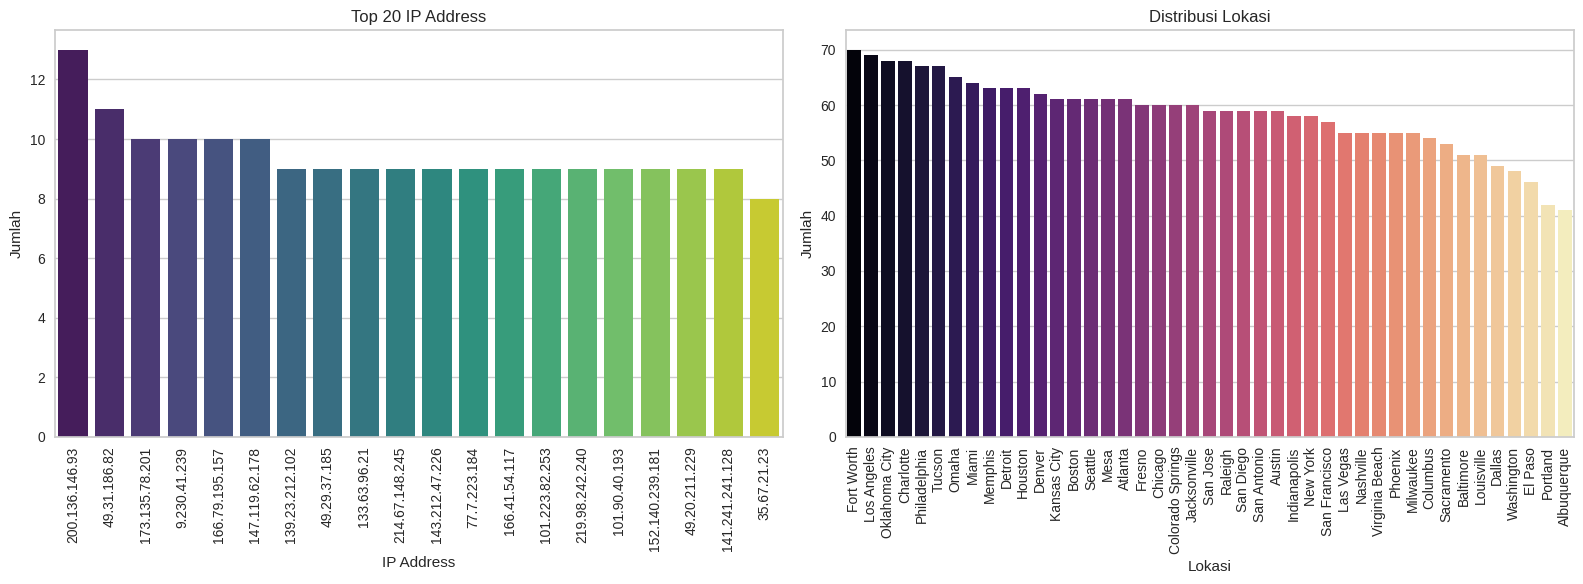

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

top_ips = df['IP Address'].value_counts().nlargest(20)
sns.barplot(x=top_ips.index, y=top_ips.values, ax=axes[0], hue=top_ips.index, dodge=False, legend=False, palette=sns.color_palette("viridis", len(top_ips)))
axes[0].set_title('Top 20 IP Address')
axes[0].set_xlabel('IP Address')
axes[0].set_ylabel('Jumlah')
axes[0].tick_params(axis='x', rotation=90)

location_counts = df['Location'].value_counts()
sns.barplot(x=location_counts.index, y=location_counts.values, ax=axes[1], hue=location_counts.index, dodge=False, legend=False, palette=sns.color_palette("magma", len(location_counts)))
axes[1].set_title('Distribusi Lokasi')
axes[1].set_xlabel('Lokasi')
axes[1].set_ylabel('Jumlah')
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [12]:
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


In [13]:
# Ambil kolom tertentu dan buat DataFrame baru
X = df.iloc[:, [2, 4, 9, 12, 13]].values
data = pd.DataFrame(X, columns=['TransactionAmount', 'TransactionType', 'Channel', 'TransactionDuration', 'LoginAttempts'])

# Menampilkan data yang diambil dalam format DataFrame dengan nama kolom yang sesuai
print(pd.DataFrame(X, columns=['TransactionAmount', 'TransactionType', 'Channel', 'TransactionDuration', 'LoginAttempts']))

     TransactionAmount TransactionType Channel TransactionDuration  \
0                14.09           Debit     ATM                  81   
1               376.24           Debit     ATM                 141   
2               126.29           Debit  Online                  56   
3                184.5           Debit  Online                  25   
4                13.45          Credit  Online                 198   
...                ...             ...     ...                 ...   
2507            856.21          Credit  Branch                 109   
2508            251.54           Debit  Branch                 177   
2509             28.63           Debit  Branch                 146   
2510            185.97           Debit  Online                  19   
2511            243.08          Credit  Online                  93   

     LoginAttempts  
0                1  
1                1  
2                1  
3                1  
4                1  
...            ...  
2507        

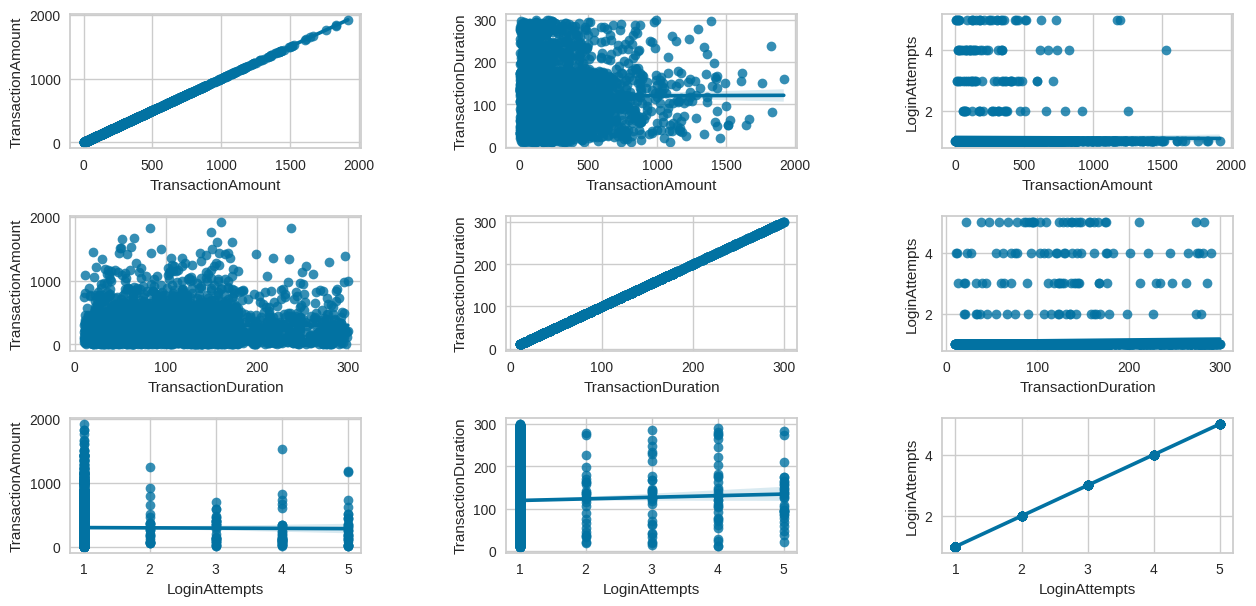

In [14]:
plt.figure(1 , figsize = (15 , 7))
n = 0
for x in ["TransactionAmount", "TransactionDuration", "LoginAttempts"]:
    for y in ["TransactionAmount", "TransactionDuration", "LoginAttempts"]:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = df)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

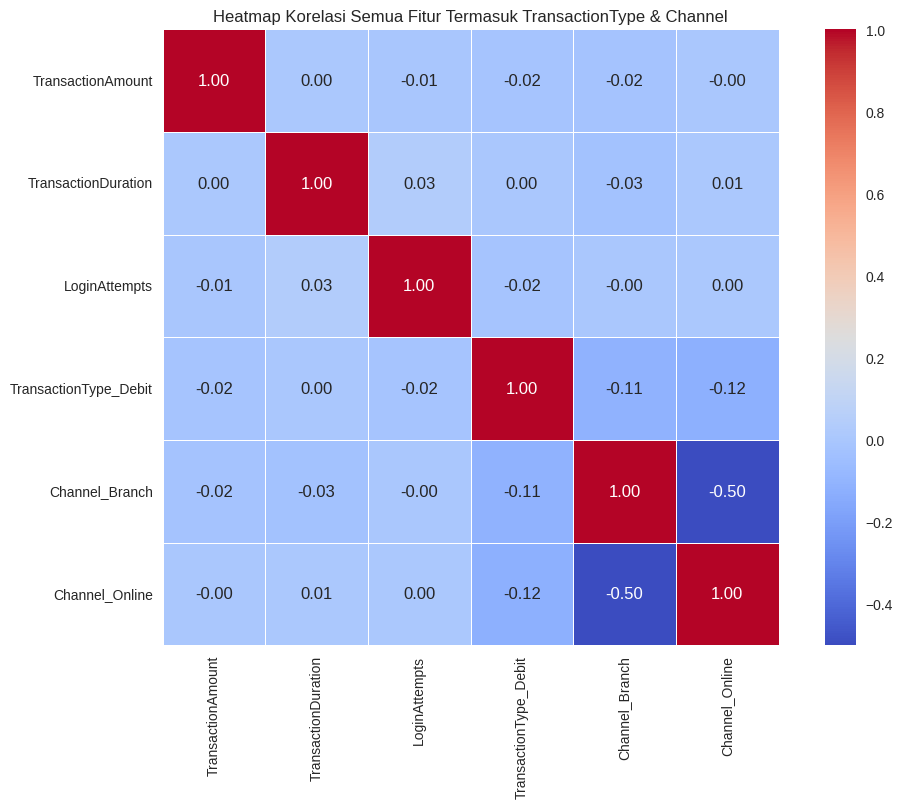

In [15]:
# One-Hot Encoding sudah dilakukan sebelumnya
df_encoded = pd.get_dummies(data, columns=["TransactionType", "Channel"], drop_first=True)

# Menghitung matriks korelasi
corr_matrix = df_encoded.corr()

# 🔹 Visualisasi Heatmap Korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, square=True)

# Menampilkan plot
plt.title("Heatmap Korelasi Semua Fitur Termasuk TransactionType & Channel")
plt.show()

In [16]:
# Gunakan nilai hasil encoding sebagai input X
X = df_encoded.values

# Inisialisasi dan terapkan Min-Max Scaler
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Konversi ke DataFrame dengan nama kolom baru yang sesuai
df_normalized = pd.DataFrame(X_normalized, columns=df_encoded.columns)

# Tampilkan hasil normalisasi
print(df_normalized.head())

   TransactionAmount  TransactionDuration  LoginAttempts  \
0           0.007207             0.244828            0.0   
1           0.195940             0.451724            0.0   
2           0.065680             0.158621            0.0   
3           0.096016             0.051724            0.0   
4           0.006874             0.648276            0.0   

   TransactionType_Debit  Channel_Branch  Channel_Online  
0                    1.0             0.0             0.0  
1                    1.0             0.0             0.0  
2                    1.0             0.0             1.0  
3                    1.0             0.0             1.0  
4                    0.0             0.0             1.0  


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [17]:
# Inisialisasi K-Means dengan jumlah cluster = 3
kmeans = KMeans(n_clusters=3, random_state=0, n_init=10)
kmeans.fit(X)
k = 3

# Mendapatkan label cluster
labels = kmeans.labels_

# Konversi X menjadi DataFrame jika masih berbentuk NumPy array
df_clusters = pd.DataFrame(X, columns=df_encoded.columns)
df_clusters["Cluster"] = labels

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

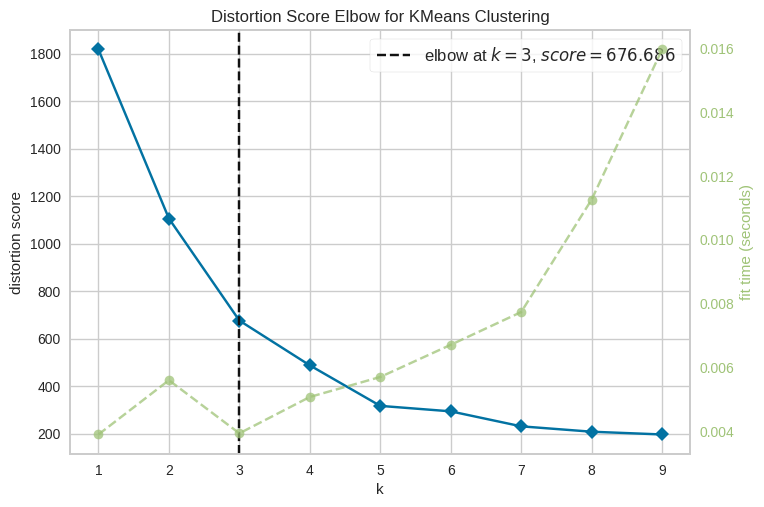

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [18]:
# Inisialisasi model KMeans tanpa parameter awal
kmeans = KMeans()

# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(1, 10))

# Fit visualizer dengan data untuk menemukan jumlah cluster optimal
visualizer.fit(X_normalized)

# Menampilkan grafik elbow untuk analisis
visualizer.show()

In [19]:
# Ambil nilai k optimal setelah visualizer.fit()
optimal_k = visualizer.elbow_value_

print(f"Optimal number of clusters: {optimal_k}")

# KMeans dan Silhouette Score
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans_optimal.fit_predict(X_normalized)

from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X_normalized, cluster_labels)
print(f"Silhouette Score: {silhouette_avg:.4f}")

Optimal number of clusters: 3
Silhouette Score: 0.5001


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [20]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.01)  # Ubah ambang sesuai konteks
X_reduced = selector.fit_transform(X_normalized)

In [21]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Cluster dengan k = 3
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_reduced)

# Hitung silhouette score
score = silhouette_score(X_reduced, labels)
print(f"Silhouette Score untuk 3 cluster: {score:.4f}")

Silhouette Score untuk 3 cluster: 0.5001


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

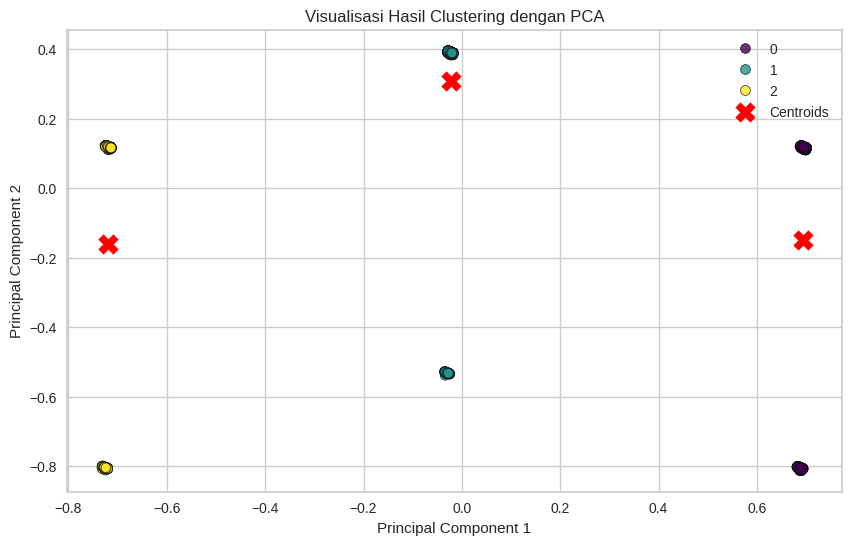

In [22]:
# PCA berdasarkan data yang dipakai untuk clustering (X_normalized)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_normalized)

# Konversi hasil PCA jadi DataFrame
df_pca = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
df_pca["Cluster"] = kmeans.labels_

# Transform centroids ke ruang PCA
centroids_pca = pca.transform(kmeans.cluster_centers_)

plt.figure(figsize=(10, 6))
sns.scatterplot(x="PC1", y="PC2", hue="Cluster", data=df_pca,
                palette="viridis", s=50, alpha=0.8, edgecolors="k")
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c="red", s=200, marker="X", label="Centroids")
plt.title("Visualisasi Hasil Clustering dengan PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [23]:
df_clusters["Cluster"] = labels
# df_normalized['Cluster'] = labels_


In [24]:
df_encoded['TransactionType_Original'] = df_encoded.filter(like='TransactionType_').idxmax(axis=1).str.replace('TransactionType_', '')
df_encoded['Channel_Original'] = df_encoded.filter(like='Channel_').idxmax(axis=1).str.replace('Channel_', '')

In [25]:
df['TransactionType_Original'] = df_encoded['TransactionType_Original']
df['Channel_Original'] = df_encoded['Channel_Original']

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [26]:
# Melakukan inverse transform untuk mengembalikan ke skala asli
X_original = scaler.inverse_transform(X)


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [27]:
# Fungsi untuk analisis karakteristik setiap cluster
def analyze_clusters(df, labels, optimal_k):
    print("Analisis Karakteristik Setiap Cluster:\n")
    for cluster_id in range(optimal_k):
        cluster_data = df[df["Cluster"] == cluster_id]

        # Hitung statistik utama untuk setiap cluster
        mean_amount = cluster_data["TransactionAmount"].mean()
        mean_duration = cluster_data["TransactionDuration"].mean()
        mean_attempts = cluster_data["LoginAttempts"].mean()

        print(f"🔹 Cluster {cluster_id}:")
        print(f"   - Rata-rata Jumlah Transaksi: {mean_amount:.2f}")
        print(f"   - Rata-rata Durasi Transaksi: {mean_duration:.2f}")
        print(f"   - Rata-rata Jumlah Percobaan Login: {mean_attempts:.2f}")
        print(f"   - Jumlah Data: {len(cluster_data)}\n")

# Panggil fungsi analisis
analyze_clusters(df_clusters, labels, optimal_k)

Analisis Karakteristik Setiap Cluster:

🔹 Cluster 0:
   - Rata-rata Jumlah Transaksi: 288.23
   - Rata-rata Durasi Transaksi: 116.68
   - Rata-rata Jumlah Percobaan Login: 1.12
   - Jumlah Data: 868

🔹 Cluster 1:
   - Rata-rata Jumlah Transaksi: 307.72
   - Rata-rata Durasi Transaksi: 122.09
   - Rata-rata Jumlah Percobaan Login: 1.12
   - Jumlah Data: 833

🔹 Cluster 2:
   - Rata-rata Jumlah Transaksi: 297.21
   - Rata-rata Durasi Transaksi: 120.31
   - Rata-rata Jumlah Percobaan Login: 1.13
   - Jumlah Data: 811



Tulis hasil interpretasinya di sini.

**Cluster 0:**

*   **Rata-rata Jumlah Transaksi**: 288.23
*   **Rata-rata Durasi Transaksi:** 116.68
*   **Rata-rata Jumlah Percobaan Login:** 1.12
*   **Jumlah Data:** 868
*   **Analisis :** Pengguna dengan jumlah transaksi paling rendah (288.23) dan durasi transaksi terpendek (116.68 detik). Jumlah percobaan login rendah (1.12). Mewakili pengguna reguler dengan aktivitas stabil.

**Cluster 1:**
*   **Rata-rata Jumlah Transaksi:** 307.72
*   **Rata-rata Durasi Transaksi:** 122.09
*   **Rata-rata Jumlah Percobaan Login:** 1.12
*   **Jumlah Data:** 833
*   **Analisis :** Memiliki jumlah transaksi dan durasi tertinggi (307.72 dan 122.09). Login tetap normal (1.12). Kemungkinan merupakan pengguna aktif atau power users.

**Cluster 2:**
*   **Rata-rata Jumlah Transaksi:** 297.21
*   **Rata-rata Durasi Transaksi:** 120.31
*   **Rata-rata Jumlah Percobaan Login:** 1.13
*   **Jumlah Data:** 811
*   **Analisis :** Transaksi dan durasi berada di tengah (297.21 dan 120.31), namun percobaan login sedikit lebih tinggi (1.13). Berpotensi menunjukkan aktivitas yang sedikit lebih kompleks, bisa jadi awal indikasi anomali.

# Contoh interpretasi [TEMPLATE]
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
- **Rata-rata Annual Income (k$):** 48,260  
- **Rata-rata Spending Score (1-100):** 56.48  
- **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan menengah dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang moderat dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka.

## Cluster 2:
- **Rata-rata Annual Income (k$):** 86,540  
- **Rata-rata Spending Score (1-100):** 82.13  
- **Analisis:** Cluster ini menunjukkan pelanggan dengan pendapatan tahunan tinggi dan pengeluaran yang sangat tinggi. Pelanggan di cluster ini merupakan kelompok premium dengan daya beli yang kuat dan cenderung mengeluarkan uang dalam jumlah besar untuk produk atau layanan.

## Cluster 3:
- **Rata-rata Annual Income (k$):** 87,000  
- **Rata-rata Spending Score (1-100):** 18.63  
- **Analisis:** Cluster ini terdiri dari pelanggan dengan pendapatan tahunan yang tinggi tetapi pengeluaran yang rendah. Mereka mungkin memiliki kapasitas finansial yang baik namun tidak terlalu aktif dalam berbelanja. Ini bisa menunjukkan bahwa mereka lebih selektif dalam pengeluaran mereka atau mungkin lebih cenderung untuk menyimpan uang.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [28]:
df_clusters.to_csv("hasil_clustering.csv", index=False)